# Imports and Definitions

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from utils.data_utils import preprocess_and_normalize_energy_data
from sklearn.linear_model import LinearRegression
from feature_sets_analysis_utils import split_data_set, fit_model, compute_log_transformed_features, apply_data_transforms, test_model
%load_ext autoreload
%autoreload 2
SEED = 1223

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
param_cols = ['batch_size','input_size','output_size']
models = {}
estimates = {}

# Linear Module
## Load Data

In [27]:
data_unnormalized_linear = pd.read_csv('../../data/linear-energies-parsed.csv')
data_linear = preprocess_and_normalize_energy_data(data_unnormalized_linear,param_cols, aggregate=True)

Shape before aggregation: (50, 38), after aggregation: (50, 27) (non numeric columns removed)


## Feature Set: Parameters

--------------------
Average R2 Cross-Validation Score: 0.987 (± 0.002)
Average MSE Cross-Validation: -7.134e-04 (± 3.596e-04)
Validation R2 Score: 0.969
Validation MSE: 1.584e-03
Test R2 Score: 0.973
Test MSE: 1.184e-04


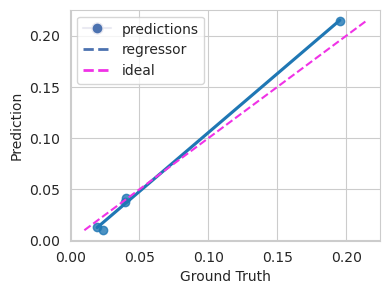

In [28]:
dfs = split_data_set(data_linear, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=4, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param'] = model
estimates['param'] = y_hat

## Feature-Set: Module Parameters + Log-Parameters

New Columns:  ['batch_size', 'input_size', 'output_size', 'log_batch_size', 'log_input_size', 'log_output_size']
--------------------
Average R2 Cross-Validation Score: -4.144 (± 4.679)
Average MSE Cross-Validation: -1.358e-01 (± 9.097e-02)
Validation R2 Score: 0.286
Validation MSE: 3.678e-02
Test R2 Score: -1.841
Test MSE: 1.253e-02


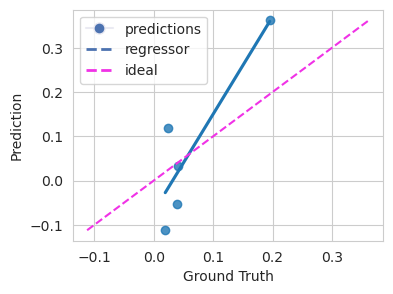

In [29]:
data_linear_with_log, param_cols_with_log = compute_log_transformed_features(data_linear, param_cols)
dfs = split_data_set(data_linear_with_log, param_cols_with_log, SEED)
transformers_dict = {
    "x_preprocessors": None,
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_log_param'] = model
estimates['param_log_param'] = y_hat

## Feature-Set: MACs Only

--------------------
Average R2 Cross-Validation Score: 0.992 (± 0.003)
Average MSE Cross-Validation: -3.718e-04 (± 9.950e-05)
Validation R2 Score: 0.971
Validation MSE: 1.481e-03
Test R2 Score: 0.986
Test MSE: 6.167e-05


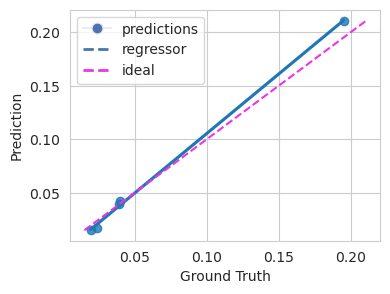

In [30]:
dfs = split_data_set(data_linear, ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": None,
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['macs'] = model
estimates['macs'] = y_hat

# Feature-Set: Module Parameters + MACs

--------------------
Average R2 Cross-Validation Score: 0.990 (± 0.001)
Average MSE Cross-Validation: -5.506e-04 (± 3.011e-04)
Validation R2 Score: 0.970
Validation MSE: 1.568e-03
Test R2 Score: 0.980
Test MSE: 8.770e-05


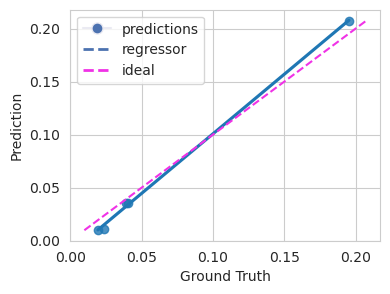

In [31]:
dfs = split_data_set(data_linear, param_cols + ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": [StandardScaler()],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_macs'] = model
estimates['param_macs'] = y_hat

## Feature-Set: Module Parameters + Log-Parameters + MACs

New Columns:  ['batch_size', 'input_size', 'output_size', 'log_batch_size', 'log_input_size', 'log_output_size']
--------------------
Average R2 Cross-Validation Score: 0.991 (± 0.004)
Average MSE Cross-Validation: -4.363e-04 (± 1.372e-04)
Validation R2 Score: 0.970
Validation MSE: 1.542e-03
Test R2 Score: 0.984
Test MSE: 7.137e-05


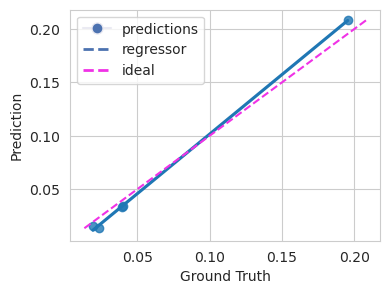

In [32]:
data_linear_with_log, param_cols_with_log = compute_log_transformed_features(data_linear, param_cols)
dfs = split_data_set(data_linear_with_log, param_cols_with_log + ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": [StandardScaler()],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_log_param_macs'] = model
estimates['param_log_param_macs'] = y_hat

# Comparison of all models

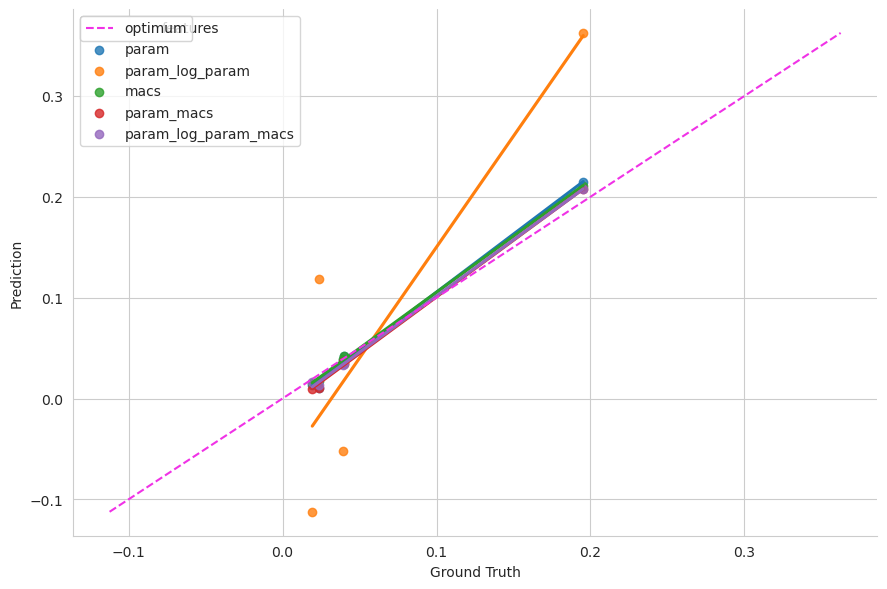

In [33]:
df_to_plot = pd.DataFrame(columns=["features","y_hat",'y'])
for model_name, model in models.items():
    new_df = pd.DataFrame(data={'features':[model_name]*len(dfs['y_test']),'y_hat':np.squeeze(estimates[model_name]),'y':np.squeeze(dfs['y_test'])})
    df_to_plot = pd.concat([df_to_plot, new_df], ignore_index=True)
min_x = min(min(df_to_plot.y_hat),min(df_to_plot.y))
max_x = max(max(df_to_plot.y_hat),max(df_to_plot.y))
g = sns.lmplot(data=df_to_plot, x="y", y="y_hat", hue="features", ci=None, height=6, aspect=1.5, facet_kws={'legend_out':False}, markers='o')
plt.plot([min_x, max_x], [min_x, max_x],ls='--', marker='', label='optimum', color="#f032e6")
line = Line2D([0], [0], ls='--', label='optimum', color='#f032e6')
g.set(xlabel='Ground Truth', ylabel='Prediction')
legend1 = g.legend
legend2 = plt.legend(handles = [plt.plot([],ls="--", color=line.get_color())[0]], labels=[line.get_label()], loc='best')
g.fig.add_artist(legend1)
g.fig.add_artist(legend2)